### 셀레니움 버전 체크
- Name: selenium
- Version: 4.11.2


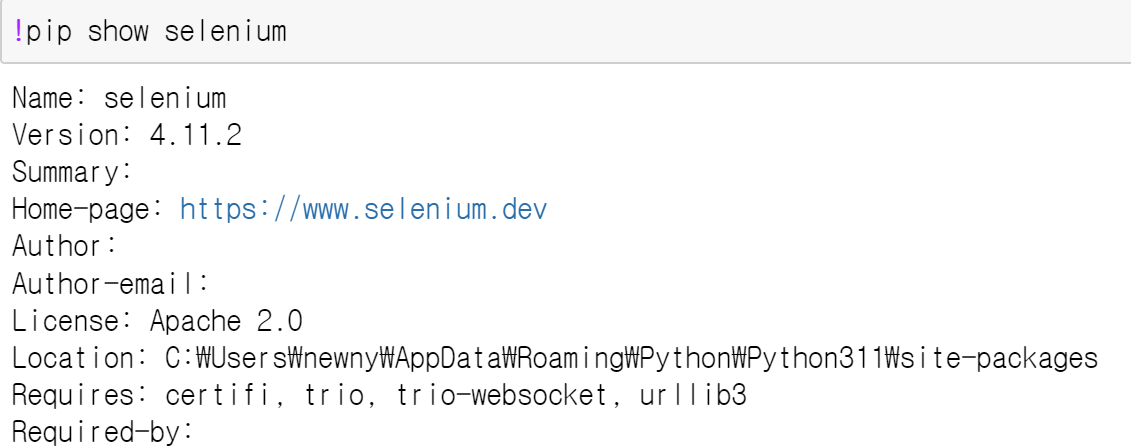

In [50]:

import time
import pandas as pd
# 파일시스템을 위한 라이브러리 (삭제, 생성)
import os
# 이미지의 경로를 실제 파일로 저장
from urllib.request import urlretrieve

query = '동명동 회식'

driver = wb.Chrome()
driver.get('https://map.naver.com/p?c=15.00,0,0,0,dh')
time.sleep(3)

search = driver.find_element(By.CSS_SELECTOR, 'div.input_box input')
search.send_keys(query)
search.send_keys(Keys.ENTER)
time.sleep(3)

titles = []

def click_title(i):
    # 컴퓨터에게 바라보고 있는 창을 원하는 iframe으로 변경
    driver.switch_to.frame("searchIframe")
    title = driver.find_elements(By.CSS_SELECTOR, '.place_bluelink')
    title[i].click()
    time.sleep(3)

    # iframe1 => iframe2 바로 이동 불가능
    # iframe1 => 원본창 => iframe2 이런식으로 이동해야함
    driver.switch_to.default_content()
    driver.switch_to.frame("entryIframe")
    real_title = driver.find_element(By.CSS_SELECTOR, '#_title > span')
    titles.append(real_title.text)
    driver.switch_to.default_content()
    
def click_arrow():
    driver.switch_to.frame('searchIframe')
    driver.find_element('#app-root > div > div.XUrfU > div.zRM9F > a:nth-child(5) > svg')
    driver.switch_to.default_content()

i=0
while True:
    try:
        click_title(i)
        i+=1
        print(titles)
    except:
        click_arrow()
        i=0

NoSuchFrameException: Message: searchIframe
